In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import rdMolDraw2D

In [10]:
modmols = []
patt = Chem.MolFromSmarts('ClccccF')

smi = 'c1cc(F)ccc1Cl'
molist = [Chem.MolFromSmiles(smi)]

for mol in molist:
    hit_ats = list(mol.GetSubstructMatch(patt))
    hit_bonds = []
    for bond in patt.GetBonds():
        aid1 = hit_ats[bond.GetBeginAtomIdx()]
        aid2 = hit_ats[bond.GetEndAtomIdx()]
        hit_bonds.append(mol.GetBondBetweenAtoms(aid1,aid2).GetIdx())
    d = rdMolDraw2D.MolDraw2DSVG(500, 500) # or MolDraw2DCairo to get PNGs
    rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=hit_ats,
                                       highlightBonds=hit_bonds)
    modmols.append(mol)  

In [11]:
hit_ats

[7, 6, 5, 4, 2, 3]

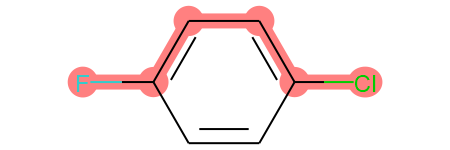

In [12]:
modmols[0]

In [16]:
Draw.MolsToGridImage(modmols,highlightAtomLists=hit_ats)

AttributeError: 'int' object has no attribute '__iter__'